# Statistics

## Creating folders

In [1]:
main_folder = 'Coffee_analysis-POS'
report_file_name = 'Coffee_Beans_HILIC_POS-statistics-report'


import os

# Create the directory if it doesn't exist
if not os.path.exists(main_folder):
    os.makedirs(main_folder)

# Create the directory if it doesn't exist
if not os.path.exists(main_folder + '/statistics'):
    os.makedirs(main_folder + '/statistics')

## Image formats to save

In [2]:
# To work properly always save atleast png version of the figures
sufixes = ['.png', '.pdf'] # sufices for the image files to be saved in

## Loading modules

In [3]:
import pandas as pd
import numpy as np

from itertools import cycle
import io

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


## Setting up the report files

In [4]:
import pdf_reporter as pdf_rptr

# Reload the module to get the latest changes
# This will be deleted later, just for testing purposes
import importlib
importlib.reload(pdf_rptr)


#---------------------------------------------
#REPORTING
report_path = main_folder + '/' + report_file_name + '.pdf'
title_text =  main_folder 
report = pdf_rptr.Report(name = report_path, title = title_text)
report.initialize_report('statistics')

## Loading data

In [5]:
# INPUTS
data_file = main_folder + '/Coffee_Beans_HILIC_POS-data.csv'
no_log_transf_file = main_folder + '/Coffee_Beans_HILIC_POS-data_before_log-transf.csv'
variable_metadata_file = main_folder + '/Coffee_Beans_HILIC_POS-variable_metadata.csv'
metadata_file = main_folder + '/Coffee_Beans_HILIC_POS-metadata.csv'

# OUTPUTS
output_file_prefix = main_folder +  '/statistics/Coffee_Beans_statistics-POS'


#---------------------------------------------
# REPORTING
text = 'Data were loaded from the following files: '
text_file_names = '<b>' + data_file + '\n'+ no_log_transf_file + '\n' + variable_metadata_file + '\n' + metadata_file + '</b>'
report.add_together([('text', text),
            ('text', text_file_names, 'italic', 'center'),
            'line'])


In [6]:
data_no_log_transf = pd.read_csv(no_log_transf_file, header = 0, sep = ';')
data_no_log_transf  = data_no_log_transf.fillna(0)


#---------------------------------------------
# REPORTING
text = 'Data_no_log_transf file was loaded.'
report.add_together([
    ('text', text),
    ('table', data_no_log_transf)])

data_no_log_transf 


,cpdID,Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),Area: C_Ol_02_N_POS.raw (F11),Area: KR_K_01_R_POS.raw (F72),Area: KE_Ol_01_N_POS.raw (F66),Area: G_K_03_R_POS.raw (F53),Area: QC13_POS.raw (F99),...,Area: H_Ol_01_R_POS.raw (F58),Area: H_Ol_03_N_POS.raw (F61),Area: Bez_Op_02_R_POS.raw (F5),Area: KU_Op_01_R_POS.raw (F81),Area: QC23_POS.raw (F109),Area: ES_01_POS.raw (F42),Area: ES_02_POS.raw (F43),Area: ES_03_POS.raw (F44),Area: QC24_POS.raw (F110),Area: QC25_POS.raw (F111)
0,M138T350,22146.729581,21942.060205,21636.652432,15303.363723,23116.228228,21407.844154,23718.226816,21837.268397,22184.085786,...,21711.217992,24588.661489,21020.026757,21315.763841,21887.021388,31007.065714,31779.501913,30796.117320,22144.342027,22130.732252
1,M195T46,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
2,M195T46_1,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
3,M195T45,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
4,M94T225,22117.483153,21947.672766,21566.517731,22484.186249,18382.720020,21636.662216,20110.710934,22084.976125,22012.755777,...,21748.318390,20004.085508,22442.714444,22887.064402,22038.295096,23376.466042,23712.755122,22386.522890,22126.854192,21946.945219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,M222T314,21860.560874,22139.816459,22686.893699,22100.593222,17650.242629,22952.568275,18407.669027,22424.956935,22106.107766,...,22530.324286,19816.143771,22171.637653,22203.773492,22100.959356,23584.243811,23898.723223,23817.571535,22022.867996,21923.561179
2485,M363T312,22257.784057,21896.253310,22744.136271,21850.946545,17101.925886,22534.449107,19728.858018,23375.594392,21945.546131,...,22171.224882,17996.255773,22209.964136,21967.465149,22420.035575,23040.745854,23894.125611,22993.620351,21717.459995,22230.988334
2486,M303T340,21803.613687,23005.037410,23371.904798,22860.967826,22009.103443,22193.222121,23722.870210,21906.199240,22737.607359,...,21996.908558,19037.589542,16694.185535,20166.036809,18323.778831,18811.072089,18627.969739,18378.651172,22523.549076,21942.670543
2487,M264T311,22772.831753,21927.895748,22167.463308,21815.904821,17826.845635,21757.363925,18972.419457,23108.994681,22088.888024,...,21941.615735,17863.272471,20827.936725,21717.472650,21954.839256,19593.830574,21646.686236,22232.763120,22170.002945,22273.739914


In [7]:
data = pd.read_csv(data_file, header=0, sep = ';', index_col=0)
data = data.fillna(0)

#---------------------------------------------
# REPORTING
text = 'Data file was loaded.'
report.add_together([
    ('text', text),
    ('table', data)])

data


,cpdID,Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),Area: C_Ol_02_N_POS.raw (F11),Area: KR_K_01_R_POS.raw (F72),Area: KE_Ol_01_N_POS.raw (F66),Area: G_K_03_R_POS.raw (F53),Area: QC13_POS.raw (F99),...,Area: H_Ol_01_R_POS.raw (F58),Area: H_Ol_03_N_POS.raw (F61),Area: Bez_Op_02_R_POS.raw (F5),Area: KU_Op_01_R_POS.raw (F81),Area: QC23_POS.raw (F109),Area: ES_01_POS.raw (F42),Area: ES_02_POS.raw (F43),Area: ES_03_POS.raw (F44),Area: QC24_POS.raw (F110),Area: QC25_POS.raw (F111)
0,M138T350,22146.729581,21942.060205,21636.652432,15303.363723,23116.228228,21407.844154,23718.226816,21837.268397,22184.085786,...,21711.217992,24588.661489,21020.026757,21315.763841,21887.021388,31007.065714,31779.501913,30796.117320,22144.342027,22130.732252
1,M195T46,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
2,M195T46_1,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
3,M195T45,22107.887923,22047.326114,21754.441376,22281.557697,22692.495852,22555.506170,23496.710619,21046.505370,21869.766205,...,22092.188872,23571.887456,13983.728764,22305.363169,22004.925594,25389.385560,25376.300197,25259.595656,22060.221599,22019.505759
4,M94T225,22117.483153,21947.672766,21566.517731,22484.186249,18382.720020,21636.662216,20110.710934,22084.976125,22012.755777,...,21748.318390,20004.085508,22442.714444,22887.064402,22038.295096,23376.466042,23712.755122,22386.522890,22126.854192,21946.945219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,M222T314,21860.560874,22139.816459,22686.893699,22100.593222,17650.242629,22952.568275,18407.669027,22424.956935,22106.107766,...,22530.324286,19816.143771,22171.637653,22203.773492,22100.959356,23584.243811,23898.723223,23817.571535,22022.867996,21923.561179
2485,M363T312,22257.784057,21896.253310,22744.136271,21850.946545,17101.925886,22534.449107,19728.858018,23375.594392,21945.546131,...,22171.224882,17996.255773,22209.964136,21967.465149,22420.035575,23040.745854,23894.125611,22993.620351,21717.459995,22230.988334
2486,M303T340,21803.613687,23005.037410,23371.904798,22860.967826,22009.103443,22193.222121,23722.870210,21906.199240,22737.607359,...,21996.908558,19037.589542,16694.185535,20166.036809,18323.778831,18811.072089,18627.969739,18378.651172,22523.549076,21942.670543
2487,M264T311,22772.831753,21927.895748,22167.463308,21815.904821,17826.845635,21757.363925,18972.419457,23108.994681,22088.888024,...,21941.615735,17863.272471,20827.936725,21717.472650,21954.839256,19593.830574,21646.686236,22232.763120,22170.002945,22273.739914


In [8]:
variable_metadata= pd.read_csv(variable_metadata_file, header=0, sep = ';', index_col=0)

#---------------------------------------------
# REPORTING
text = 'Variable metadata file was loaded.'
report.add_together([
    ('text', text),
    ('table', variable_metadata)])

variable_metadata

,cpdID,Name,Formula,Annot. DeltaMass [ppm],Annotation MW,Calc. MW,m/z,RT [min],# mzVault Results,CSID,SMILES,InChI Key,mzCloud Best Match,Mass List Match: Natural Products Atlas 2021_08,Mass List Match: LipidMaps Structure Database 2023-01-11
0,M138T350,2-Hydroxybenzamide,C7 H7 N O2,-1.68,137.04768,137.04745,138.05472,5.829,0,4963.0,c1ccc(c(c1)C(=O)N)O,SKZKKFZAGNVIMN-UHFFFAOYSA-N,NaN,Multiple matches found,No matches found
1,M195T46,Cafeine,C8 H10 N4 O2,-1.68,194.08038,194.08005,195.08733,0.759,0,NaN,NaN,NaN,NaN,Single match found,No matches found
2,M195T46_1,(Hexanoylamino)acetate,C8 H14 N O3,4.04,172.09737,172.09806,195.08728,0.765,0,1271264.0,CCCCCC(=O)NCC(=O)[O-],UPCKIPHSXMXJOX-UHFFFAOYSA-M,NaN,No matches found,No matches found
3,M195T45,NaN,NaN,NaN,NaN,156.12419,195.08735,0.756,0,NaN,NaN,NaN,NaN,No matches found,No matches found
4,M94T225,Aniline,C6 H7 N,-1.38,93.05785,93.05772,94.06500,3.744,0,5889.0,c1ccc(cc1)N,PAYRUJLWNCNPSJ-UHFFFAOYSA-N,96.8,No matches found,No matches found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304T313,Delphinidin,C15 H11 O7,-1.35,303.05048,303.05007,304.05735,5.213,0,114185.0,c1c(cc(c(c1O)O)O)c2c(cc3c(cc(cc3[o+]2)O)O)O,JKHRCGUTYDNCLE-UHFFFAOYSA-O,NaN,No matches found,Multiple matches found
6127,M338T311,"N-(3,5-Dimethoxyphenyl)-3-[4-(2-hydroxyethyl)-...",C17 H27 N3 O4,-1.82,337.20016,337.19954,338.20679,5.189,0,628050.0,COc1cc(cc(c1)OC)NC(=O)CCN2CCN(CC2)CCO,WJXXLQYTSJZGOL-UHFFFAOYSA-N,NaN,No matches found,No matches found
6128,M617T38,"PA(12:0/18:2(9Z,12Z))",C33 H61 O8 P,-0.65,616.41041,616.41001,617.41728,0.628,0,NaN,NaN,NaN,NaN,No matches found,Multiple matches found
6129,M615T38,"PA(12:0/18:3(6Z,9Z,12Z))",C33 H59 O8 P,-1.80,614.39476,614.39365,615.40092,0.627,0,NaN,NaN,NaN,NaN,No matches found,Multiple matches found


In [9]:
metadata = pd.read_csv(metadata_file, header=0, sep = ';', index_col=0)

# Reorder 'metadata' based on 'data' column order
metadata.set_index('SampleFile', inplace=True)
metadata = metadata.reindex(data.columns[1:])
metadata.reset_index(inplace=True)


#---------------------------------------------
# REPORTING
text = 'Metadata file was loaded and <b>re-ordered by column order of the data.</b>'
report.add_together([
    ('text', text),
    ('table', metadata)])

metadata

,index,Study File ID,File Name,SampleType,Polarity,Coffee Type,Coffee Brand
0,Area: QC11_POS.raw (F97),F97,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Quality Control,POS,QC-IS,QC
1,Area: QC12_POS.raw (F98),F98,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Quality Control,POS,QC-IS,QC
2,Area: EY_Ol_02_R_POS.raw (F48),F48,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,R,Etiopie Yirga - Olomouc
3,Area: B_K_02_R_POS.raw (F2),F2,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,R,Brazílie - Krnov
4,Area: C_Ol_02_N_POS.raw (F11),F11,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,N,Kolumbie - Olomouc
...,...,...,...,...,...,...,...
79,Area: ES_01_POS.raw (F42),F42,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,R,Espresso - Honduras - Olomouc
80,Area: ES_02_POS.raw (F43),F43,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,R,Espresso - Honduras - Olomouc
81,Area: ES_03_POS.raw (F44),F44,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Sample,POS,R,Espresso - Honduras - Olomouc
82,Area: QC24_POS.raw (F110),F110,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,Quality Control,POS,QC-IS,QC


## Statistics

### Correlations

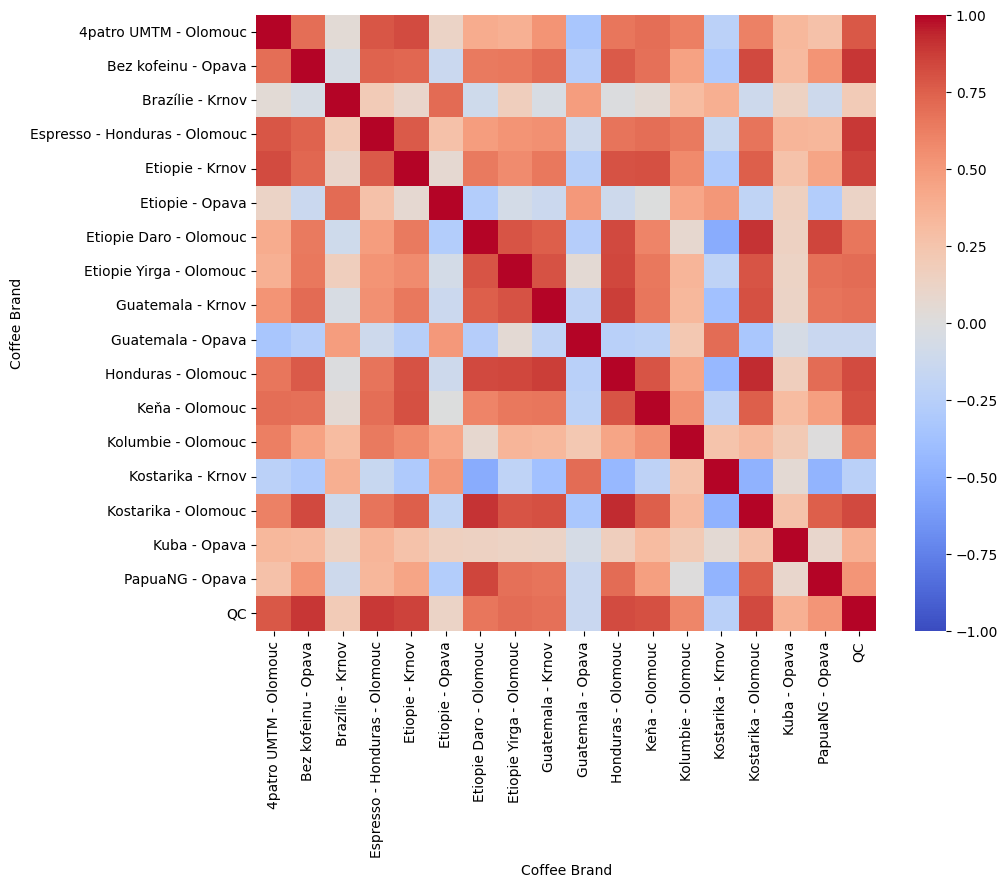

In [10]:
column_name = 'Coffee Brand'

# Group the data by 'column_name' and calculate the mean of each group
grouped_means = data.iloc[:, 1:].groupby(metadata[column_name]).mean()

# Calculate the correlation matrix of the group means
correlation_matrix = grouped_means.T.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
name = output_file_prefix + '-group_correlation_matrix_heatmap-0'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'Group correlation matrix heatmap was created. Grouping is based on: ' + column_name
report.add_together([
    ('text', text), 
    ('image', name), 
    'pagebreak'])


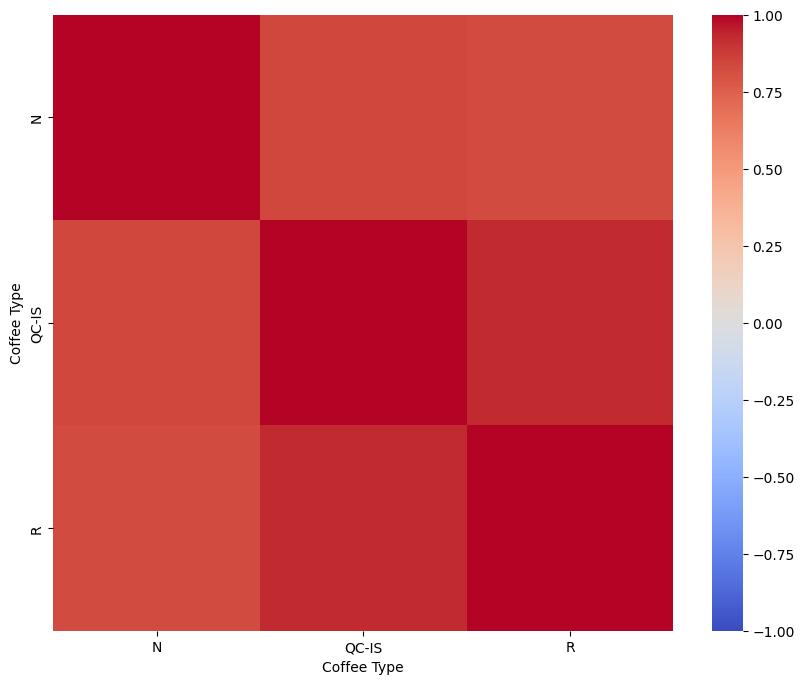

In [11]:
column_name = 'Coffee Type'

# Group the data by 'column_name' and calculate the mean of each group
grouped_means = data.iloc[:, 1:].groupby(metadata[column_name]).mean()

# Calculate the correlation matrix of the group means
correlation_matrix = grouped_means.T.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
name = output_file_prefix + '-group_correlation_matrix_heatmap-1'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'Group correlation matrix heatmap was created. Grouping is based on: ' + column_name
report.add_together([
    ('text', text), 
    ('image', name), 
    'pagebreak'])

### (Cohen's) d-statistics

In [12]:
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled variance
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)

    d = diff / np.sqrt(pooled_var)
    return d

In [13]:
column_name = 'Coffee Brand'

data_transposed = data.iloc[:, 1:].T
column = metadata[column_name].to_list()
data_transposed[column_name] = column

column_unique_values = data_transposed[column_name].unique()
num_unique_values = len(column_unique_values)

# Group 'data_transposed' by 'column_name'
grouped = data_transposed.groupby(column_name)

# Delete this column from the data_transposed 
data_transposed = data_transposed.drop([column_name], axis=1)

# Calculate the Cohen's d effect size for each pair of unique values of 'column_name'
effect_sizes = pd.DataFrame(index=column_unique_values, columns=column_unique_values)
for i in range(num_unique_values):
    for j in range(i+1, num_unique_values):
        group1 = grouped.get_group(column_unique_values[i]).iloc[:, :-1]  # Exclude last column
        group2 = grouped.get_group(column_unique_values[j]).iloc[:, :-1]  # Exclude last column
        
        effect_sizes.iloc[i, j] = cohens_d(group1, group2)
        effect_sizes.iloc[j, i] = effect_sizes.iloc[i, j]

#---------------------------------------------
# REPORTING
text = "The Cohen's d effect size was calculated for each pair of unique values of the variable " + column_name + '.'
view_data = effect_sizes.applymap(lambda cell: np.round(cell, 3) if isinstance(cell, np.ndarray) else cell)

report.add_together([
    ('text', text),
    ('table', view_data)])

view_data

,QC,Etiopie Yirga - Olomouc,Brazílie - Krnov,Kolumbie - Olomouc,Kostarika - Krnov,Keňa - Olomouc,Guatemala - Krnov,4patro UMTM - Olomouc,Kostarika - Olomouc,Etiopie - Krnov,Etiopie Daro - Olomouc,PapuaNG - Opava,Kuba - Opava,Etiopie - Opava,Guatemala - Opava,Honduras - Olomouc,Bez kofeinu - Opava,Espresso - Honduras - Olomouc
QC,NaN,"[-1.57, -1.431, -1.431, -1.431, 1.908, 0.998, ...","[4.299, -1.379, -1.379, -1.379, -5.708, -0.473...","[-2.063, -0.622, -0.622, -0.622, 2.786, 0.518,...","[1.242, -8.848, -8.848, -8.848, 4.617, -0.128,...","[-3.348, -2.046, -2.046, -2.046, 2.206, 0.298,...","[-0.052, 3.233, 3.233, 3.233, 1.089, -0.238, 0...","[5.201, 0.334, 0.334, 0.334, -11.905, -0.579, ...","[0.118, -0.187, -0.187, -0.187, 2.132, 1.401, ...","[-2.739, -1.626, -1.626, -1.626, 4.724, -0.185...","[-0.783, 0.782, 0.782, 0.782, 2.397, 0.153, 0....","[0.441, 1.437, 1.437, 1.437, 1.5, -0.256, -0.0...","[2.696, -1.185, -1.185, -1.185, -8.991, -0.549...","[2.329, -1.664, -1.664, -1.664, 1.179, -0.332,...","[2.409, 1.328, 1.328, 1.328, -2.498, -0.323, 0...","[-1.189, -1.97, -1.97, -1.97, 1.892, 0.333, -0...","[4.236, 83.837, 83.837, 83.837, 0.673, -0.401,...","[-31.259, -48.983, -48.983, -48.983, -4.507, -..."
Etiopie Yirga - Olomouc,"[-1.57, -1.431, -1.431, -1.431, 1.908, 0.998, ...",NaN,"[2.976, 0.598, 0.598, 0.598, -1.312, -1.29, 0....","[0.485, 0.687, 0.687, 0.687, -0.602, -0.613, -...","[1.238, 0.222, 0.222, 0.222, -1.04, -1.026, 1....","[0.111, 0.228, 0.228, 0.228, -0.69, -0.831, -0...","[0.975, 1.348, 1.348, 1.348, -1.135, -1.11, 1....","[2.057, 0.895, 0.895, 0.895, -1.4, -1.372, 0.6...","[0.984, 0.698, 0.698, 0.698, -0.545, 0.372, 0....","[0.46, 0.636, 0.636, 0.636, -1.076, -1.07, 0.3...","[0.836, 1.044, 1.044, 1.044, -0.816, -0.933, 0...","[1.072, 0.968, 0.968, 0.968, -1.13, -1.125, 0....","[1.501, 0.737, 0.737, 0.737, -1.392, -1.349, 1...","[1.444, 0.67, 0.67, 0.67, -0.997, -1.183, 0.52...","[1.496, 0.984, 0.984, 0.984, -1.203, -1.176, 1...","[0.326, 0.125, 0.125, 0.125, -0.767, -0.758, -...","[1.799, 8.963, 8.963, 8.963, -1.041, -1.235, 1...","[-6.373, -2.391, -2.391, -2.391, -1.49, -1.569..."
Brazílie - Krnov,"[4.299, -1.379, -1.379, -1.379, -5.708, -0.473...","[2.976, 0.598, 0.598, 0.598, -1.312, -1.29, 0....",NaN,"[-3.163, 0.065, 0.065, 0.065, 2.106, 2.039, -3...","[-2.054, -1.108, -1.108, -1.108, 4.919, 5.031,...","[-3.369, -0.69, -0.69, -0.69, 1.72, 2.447, -0....","[-2.183, 1.686, 1.686, 1.686, 3.683, 3.757, 0....","[-1.668, 0.785, 0.785, 0.785, -1.927, -1.912, ...","[-2.556, 0.171, 0.171, 0.171, 1.6, 1.496, 0.47...","[-2.429, 0.068, 0.068, 0.068, 5.793, 5.331, 0....","[-2.941, 0.631, 0.631, 0.631, 1.955, 1.547, -0...","[-2.126, 0.998, 0.998, 0.998, 4.183, 4.006, -0...","[-1.943, 0.32, 0.32, 0.32, -1.434, -1.246, 0.9...","[-1.965, 0.15, 0.15, 0.15, 1.212, 2.52, 0.261,...","[-1.926, 1.004, 1.004, 1.004, 2.63, 2.829, 1.6...","[-2.915, -0.735, -0.735, -0.735, 1.526, 1.564,...","[-1.801, 22.178, 22.178, 22.178, 0.88, 1.332, ...","[-5.655, -8.567, -8.567, -8.567, -1.225, -5.88..."
Kolumbie - Olomouc,"[-2.063, -0.622, -0.622, -0.622, 2.786, 0.518,...","[0.485, 0.687, 0.687, 0.687, -0.602, -0.613, -...","[-3.163, 0.065, 0.065, 0.065, 2.106, 2.039, -3...",NaN,"[2.207, -0.774, -0.774, -0.774, -1.369, -1.316...","[-0.822, -0.693, -0.693, -0.693, -0.187, -0.46...","[1.522, 1.201, 1.201, 1.201, -1.629, -1.549, 2...","[4.424, 0.423, 0.423, 0.423, -2.351, -2.27, 4....","[0.857, 0.133, 0.133, 0.133, 0.052, 0.991, 1.3...","[0.088, -0.02, -0.02, -0.02, -1.469, -1.439, 4...","[0.728, 0.69, 0.69, 0.69, -0.444, -0.681, 0.85...","[1.711, 0.554, 0.554, 0.554, -1.616, -1.59, 4....","[3.081, 0.148, 0.148, 0.148, -2.326, -2.205, 2...","[2.855, 0.034, 0.034, 0.034, -1.164, -1.749, 3...","[2.827, 0.581, 0.581, 0.581, -1.817, -1.73, 6....","[-0.099, -0.766, -0.766, -0.766, -0.34, -0.302...","[3.916, 14.649, 14.649, 14.649, -1.246, -1.893...","[-16.816, -5.442, -5.442, -5.442, -2.51, -2.80..."
Kostarika - Krnov,"[1.242, -8.848, -8.848, -8.848, 4.617,

In [14]:
column_name = 'Coffee Type'

data_transposed = data.iloc[:, 1:].T
column = metadata[column_name].to_list()
data_transposed[column_name] = column

column_unique_values = data_transposed[column_name].unique()
num_unique_values = len(column_unique_values)

# Group 'data_transposed' by 'column_name'
grouped = data_transposed.groupby(column_name)

# Delete this column from the data_transposed 
data_transposed = data_transposed.drop([column_name], axis=1)

# Calculate the Cohen's d effect size for each pair of unique values of 'column_name'
effect_sizes = pd.DataFrame(index=column_unique_values, columns=column_unique_values)
for i in range(num_unique_values):
    for j in range(i+1, num_unique_values):
        group1 = grouped.get_group(column_unique_values[i]).iloc[:, :-1]  # Exclude last column
        group2 = grouped.get_group(column_unique_values[j]).iloc[:, :-1]  # Exclude last column
        
        effect_sizes.iloc[i, j] = cohens_d(group1, group2)
        effect_sizes.iloc[j, i] = effect_sizes.iloc[i, j]

#---------------------------------------------
# REPORTING
 
text = "The Cohen's d effect size was calculated for each pair of unique values of the variable " + column_name + '.'
view_data = effect_sizes.applymap(lambda cell: np.round(cell, 3) if isinstance(cell, np.ndarray) else cell)

report.add_together([
    ('text', text),
    ('table', view_data)])
report.add_pagebreak()

view_data

,QC-IS,R,N
QC-IS,NaN,"[0.0, 0.16, 0.16, 0.16, 0.134, -0.136, 0.225, ...","[-1.721, -0.739, -0.739, -0.739, 2.614, 1.179,..."
R,"[0.0, 0.16, 0.16, 0.16, 0.134, -0.136, 0.225, ...",NaN,"[-0.506, -0.548, -0.548, -0.548, 3.157, 1.391,..."
N,"[-1.721, -0.739, -0.739, -0.739, 2.614, 1.179,...","[-0.506, -0.548, -0.548, -0.548, 3.157, 1.391,...",NaN


### PCA

In [15]:
# Perform PCA
pca = PCA()
pca.fit(data.iloc[:,1:].T)
pca_data = pca.transform(data.iloc[:, 1:].T)
# Calculate the percentage of variance that each PC explains
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Visualize data by plotting the first two PCs and color them based on SampleType in the metadata file
pca_df = pd.DataFrame(pca_data, columns=labels) 
pca_df

#---------------------------------------------
# REPORTING
report.add_text('<b>PCA was performed.</b>')

#### Scree Plot

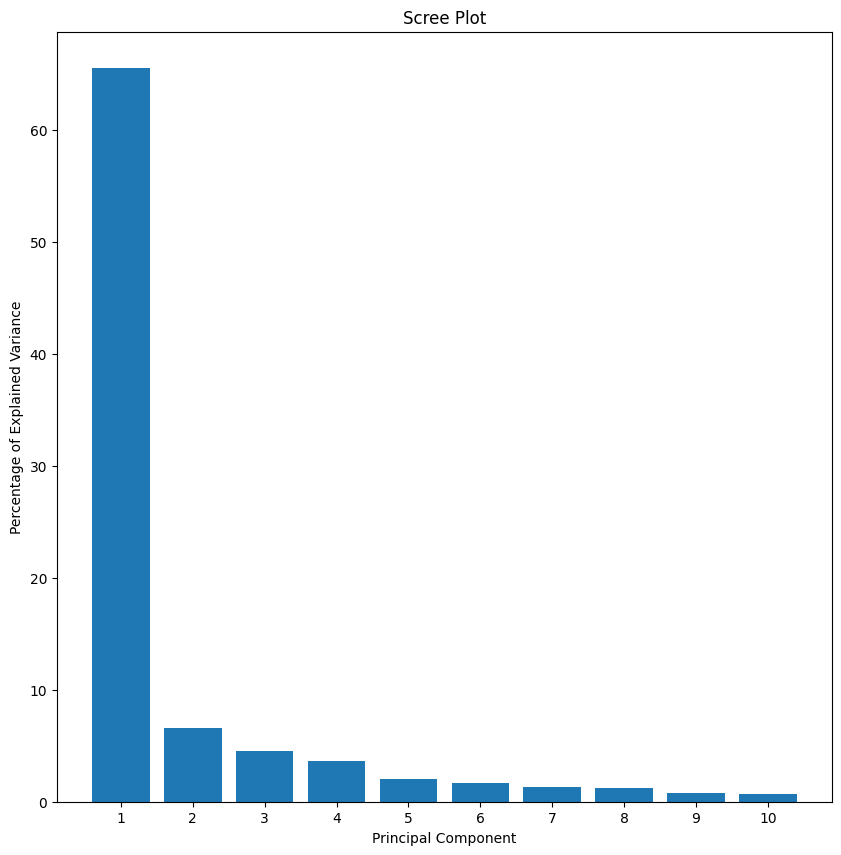

In [16]:
# Create a scree plot
fig = plt.figure(figsize=(10, 10))
plt.bar(x=range(1, 11), height=per_var[:10])

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
xticks = list(range(1, 11))
plt.xticks(xticks)

name = output_file_prefix + '_scree_plot-percentages'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()
plt.close()

#---------------------------------------------
# REPORTING
text = 'Scree plot was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name)])


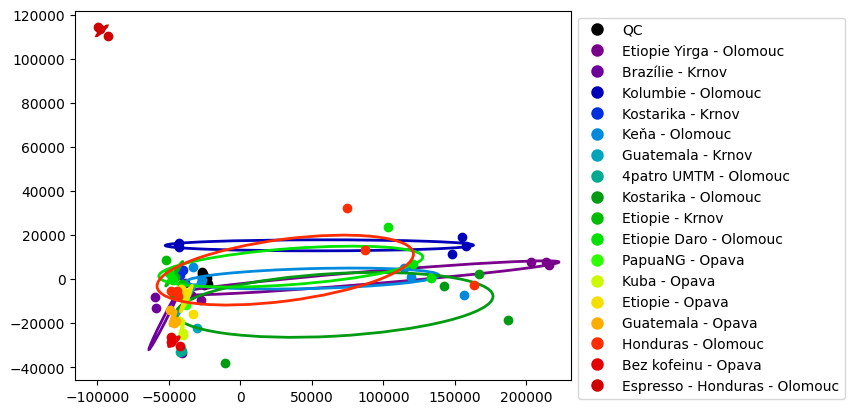

In [17]:
# INPUTS
column_name = 'Coffee Brand'


cmap = mpl.colormaps['nipy_spectral']

#get the color for each sample type
column_unique_values = metadata[column_name].unique()
num_unique_values = len(column_unique_values)
colors = [cmap(i/num_unique_values) for i in range(num_unique_values)]
sample_type_colors = dict(zip(column_unique_values, colors))

# Create custom legend handles for colors
color_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=sample_type_colors[st], markersize=10) 
                 for st in sample_type_colors.keys()]

# Loop over the sample types and plot each one in a different color
scatter_plots = []

# Loop over the sample types and plot each one in a different color
for sample_type in sample_type_colors.keys():
    df_samples = pca_df[metadata[column_name] == sample_type]
    marker = 'o'  # Use 'o' as the marker for all points
    plt.scatter(df_samples['PC1'], df_samples['PC2'], color=sample_type_colors[sample_type], marker=marker, label=sample_type)

    # Compute the covariance matrix and find the major and minor axis
    covmat = np.cov(df_samples[['PC1', 'PC2']].values.T)
    lambda_, v = np.linalg.eig(covmat)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(df_samples['PC1']), np.mean(df_samples['PC2'])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor=sample_type_colors[sample_type], lw=2, facecolor='none')
    plt.gca().add_artist(ell)

# Create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in sample_type_colors.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
name = main_folder + '/statistics/PCA_plot'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'PCA plot based on grouping by ' + column_name + ' was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name),])

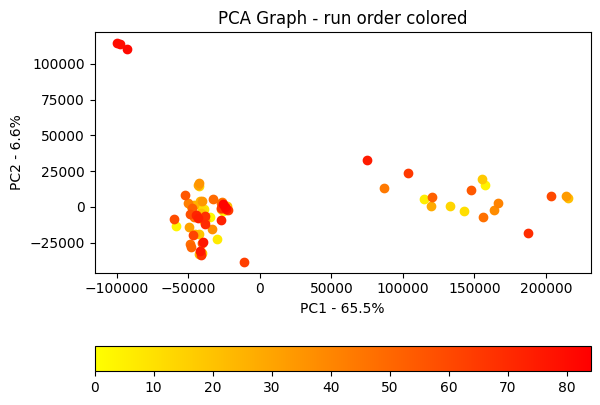

In [18]:
# Plotting PCA colored by run order to see if there is any batch effect
# Get the color for each sample type
# run order is simply the order of the columns in the data file

# Create a yellow-to-blue colormap
cmap = LinearSegmentedColormap.from_list("mycmap", ["yellow", "red"])

column_unique_values = data.columns[1:]
num_unique_values = len(column_unique_values)
colors = [cmap(i/num_unique_values) for i in range(num_unique_values)]
sample_type_colors = dict(zip(column_unique_values, colors))

# Create a new figure and axes
fig, ax = plt.subplots()

# Create custom legend handles for colors
color_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=sample_type_colors[st], markersize=10) 
                 for st in sample_type_colors.keys()]

# Plot the data
for sample_type in sample_type_colors.keys():
    df_samples = pca_df[data.columns[1:] == sample_type]
    plt.scatter(df_samples['PC1'], df_samples['PC2'], color=sample_type_colors[sample_type], label=sample_type)

plt.title('PCA Graph - run order colored')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Create a normalization object for the colorbar
norm = Normalize(vmin=0, vmax=num_unique_values)

# Create a ScalarMappable object for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar
plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2)

name = output_file_prefix + '_PCA_plot_colored_by_run_order'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'PCA plot <b> colored by run order </b> was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name),])

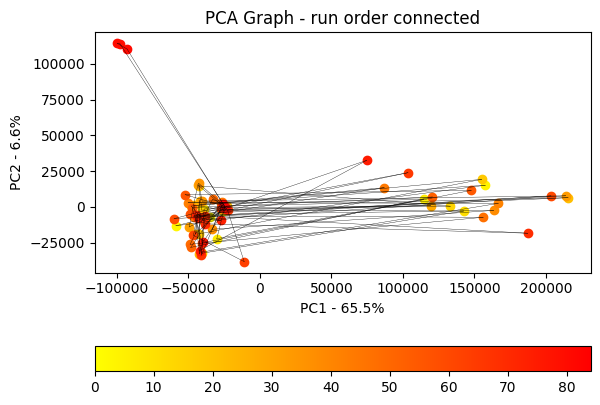

In [19]:
#Plotting PCA colored by run order to see if there is any batch effect
# Get the color for each sample type
# run order is simply the order of the columns in the data file

# Create a yellow-to-blue colormap
cmap = LinearSegmentedColormap.from_list("mycmap", ["yellow", "red"])

column_unique_values = data.columns[1:]
num_unique_values = len(column_unique_values)
colors = [cmap(i/num_unique_values) for i in range(num_unique_values)]
sample_type_colors = dict(zip(column_unique_values, colors))

# Create a new figure and axes
fig, ax = plt.subplots()

# Create custom legend handles for colors
color_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=sample_type_colors[st], markersize=10) 
                 for st in sample_type_colors.keys()]

# Plot the data
for sample_type in sample_type_colors.keys():
    df_samples = pca_df[data.columns[1:] == sample_type]
    plt.scatter(df_samples['PC1'], df_samples['PC2'], color=sample_type_colors[sample_type], label=sample_type)

plt.title('PCA Graph - run order connected')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Create a normalization object for the colorbar
norm = Normalize(vmin=0, vmax=num_unique_values)

# Create a ScalarMappable object for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar
plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2)

# Connect the points by line to see the order of the samples
for i in range(len(pca_df)-1):
    plt.plot([pca_df['PC1'].iloc[i], pca_df['PC1'].iloc[i+1]], [pca_df['PC2'].iloc[i], pca_df['PC2'].iloc[i+1]], color='black', linewidth=0.25)

name = output_file_prefix + '_PCA_plot_colored_by_run_order-connected'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'PCA plot <b> colored by run order and connected </b> was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name),])

In [20]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84
0,-25426.229470,-2542.228323,-7180.924750,4888.912397,16308.079140,-4792.128471,-351.216027,1159.981365,-1116.556611,-16191.718781,...,813.584794,-1393.746497,-198.261649,-332.387074,166.596789,101.776289,2915.236667,-1918.838915,-753.137898,2.600018e-10
1,-26528.070551,416.756613,-13554.636416,6658.427561,16222.567142,-5540.256041,3877.360444,-6564.107844,1727.613908,-8287.267304,...,-1916.809329,3964.638559,-2402.954433,-227.109500,-658.306367,-1470.851433,12446.293129,-5302.509879,-2707.588791,2.627871e-10
2,-34697.696612,-7163.191728,-16931.625262,-13754.516144,-13066.945108,-14044.963545,-4632.384356,43.466866,698.355805,-2136.051976,...,-2448.882784,1046.984351,2708.062520,197.380840,2734.947183,1798.414348,-1578.970664,799.598374,-213.461786,2.603997e-10
3,-58669.651291,-13146.771250,26898.308061,8577.907635,9599.443226,5956.924568,25666.465008,-2199.182081,-21717.637380,16495.959904,...,1557.532822,-1943.265969,611.658347,1317.226610,-593.558500,129.043025,328.624183,-76.489565,353.560517,2.571880e-10
4,157615.271280,15153.270023,9129.742379,83284.324056,-22478.886243,-11869.892965,-4506.777880,-14467.969086,-1587.570748,2500.168461,...,-2017.053859,-325.023925,-3512.738437,448.327594,134.363991,-749.259555,333.918383,1389.625929,-257.251257,2.646630e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-97758.014182,113835.928690,46760.315679,-13744.811856,-3268.575215,5789.395472,-6526.441446,1265.541555,-1064.546354,-5963.451941,...,248.257082,-42.852103,316.500965,-18.918451,376.821446,-424.791002,-132.979758,-318.940829,-29.216575,2.609113e-10
80,-99701.440247,114301.335117,44743.782365,-15031.444676,-669.178375,1809.930063,-4074.052599,2467.944780,1956.516512,-5459.196457,...,-573.716492,271.249055,-250.797688,-74.860412,-676.924287,303.066742,118.799288,323.284678,51.924138,2.622755e-10
81,-92765.003100,110225.257077,42816.570393,-5078.823184,-10869.495223,6965.020978,-7191.583609,-2530.801841,-5170.211972,-3852.098327,...,360.416250,28.842744,33.448356,-15.274179,329.884173,38.434561,-51.875659,82.332792,-77.491024,2.625598e-10
82,-24602.657265,143.214666,-11600.065770,5965.923888,15564.797908,-5729.824488,2882.117145,-6204.697366,1741.248931,-9760.279742,...,855.429723,1216.809109,-1571.945242,-1885.104021,1671.761371,2945.597123,-5633.080526,-4462.535659,-624.917777,2.592628e-10


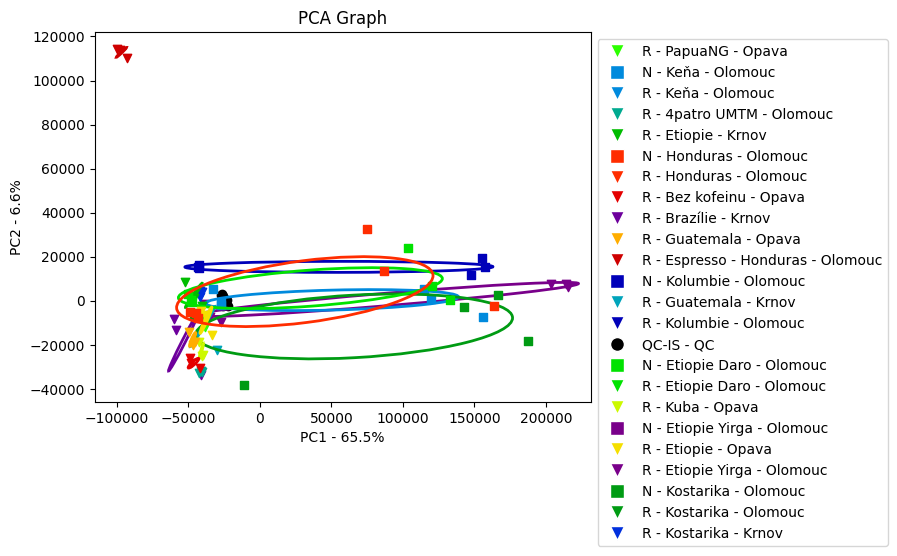

In [21]:
## PCA for both (with different markers)
column_name = 'Coffee Brand'
second_column_name = 'Coffee Type'

cmap = mpl.colormaps['nipy_spectral']

#get the color (for first column)
column_unique_values = metadata[column_name].unique()
num_unique_values = len(column_unique_values)
colors = [cmap(i/num_unique_values) for i in range(num_unique_values)]
sample_type_colors = dict(zip(column_unique_values, colors))

#get markers (for second column)
second_column_unique_values = metadata[second_column_name].unique()
markers = cycle(['o', 'v', 's', '^', '*', '<','p', '>', 'h', 'H', 'D', 'd', 'P', 'X'])
coffee_type_markers = dict(zip(second_column_unique_values, markers))

for sample_type in sample_type_colors.keys():
    df_samples = pca_df[metadata[column_name] == sample_type]
    coffee_type = metadata.loc[df_samples.index, second_column_name].iloc[0]
    marker = coffee_type_markers.get(coffee_type, 'o')  # Default to 'o' if coffee type is not in the dictionary
    plt.scatter(df_samples['PC1'], df_samples['PC2'], color=sample_type_colors[sample_type], marker=marker, label=sample_type)

    # Compute the covariance matrix and find the major and minor axis 
    # ellipse = 1-standard-deviation contour
    covmat = np.cov(df_samples[['PC1', 'PC2']].values.T)
    lambda_, v = np.linalg.eig(covmat)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(df_samples['PC1']), np.mean(df_samples['PC2'])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor=sample_type_colors[sample_type], lw=2, facecolor='none')
    plt.gca().add_artist(ell)

legend_elements = []
existing_combinations = set(zip(metadata[column_name], metadata[second_column_name]))

# Add the colors and markers to the legend
for sample_type, coffee_type in existing_combinations:
    color = sample_type_colors[sample_type]
    marker = coffee_type_markers[coffee_type]
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', label=coffee_type + ' - ' + sample_type,
                                  markerfacecolor=color, markersize=10))

# Create the legend
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
name = output_file_prefix + 'detailed_PCA'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()
#---------------------------------------------
# REPORTING
text = 'Detailed PCA plot based on grouping by ' + column_name + ' and ' + second_column_name + ' was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name),])


### PCA with identifying outliers

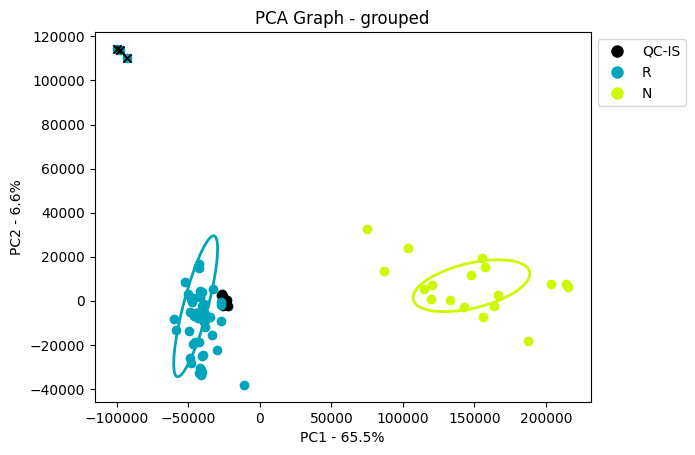

In [22]:
#PCA with identified outliers and an ellipse for (roasted, non-roasted and outiers)
column_name = 'Coffee Type'

cmap = mpl.colormaps['nipy_spectral']


#get the color for each sample type
column_unique_values = metadata[column_name].unique()
num_unique_values = len(column_unique_values)
colors = [cmap(i/num_unique_values) for i in range(num_unique_values)]
sample_type_colors = dict(zip(column_unique_values, colors))

# Create custom legend handles for colors
color_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=sample_type_colors[st], markersize=10) 
                 for st in sample_type_colors.keys()]

# Loop over the sample types and plot each one in a different color
# by grouping the data by sample type
grouped = pca_df.groupby(metadata[column_name])

# Calculate the Z-scores of PC1 and PC2
pca_df['PC1_zscore'] = zscore(pca_df['PC1'])
pca_df['PC2_zscore'] = zscore(pca_df['PC2'])

# Identify outliers as any points where the absolute Z-score is greater than 3
outliers = pca_df[(abs(pca_df['PC1_zscore']) > 3) | (abs(pca_df['PC2_zscore']) > 3)]

# Create a figure and axis
fig, ax = plt.subplots()

# Loop over the sample types and plot each one in a different color (with an ellipse, and without outliers)
for sample_type in sample_type_colors.keys():
    df_samples = grouped.get_group(sample_type)
    plt.scatter(df_samples['PC1'], df_samples['PC2'], color=sample_type_colors[sample_type], label=sample_type)

    # Compute the covariance matrix and find the major and minor axis
    covmat = np.cov(df_samples[['PC1', 'PC2']].values.T)
    lambda_, v = np.linalg.eig(covmat)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(df_samples['PC1']), np.mean(df_samples['PC2'])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor=sample_type_colors[sample_type], lw=2, facecolor='none')
    plt.gca().add_artist(ell)
    
# Plot the outliers (and ellipse)
plt.scatter(outliers['PC1'], outliers['PC2'], color='black', marker='x', label='Outliers')

# Create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in sample_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('PCA Graph - grouped')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
name = output_file_prefix + '_PCA_plot_grouped'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text = 'PCA plot with identified outliers and grouped by: '+ column_name + ' was created and added into: ' + name
report.add_together([
    ('text', text),
    ('image', name),])


### PCA Loadings

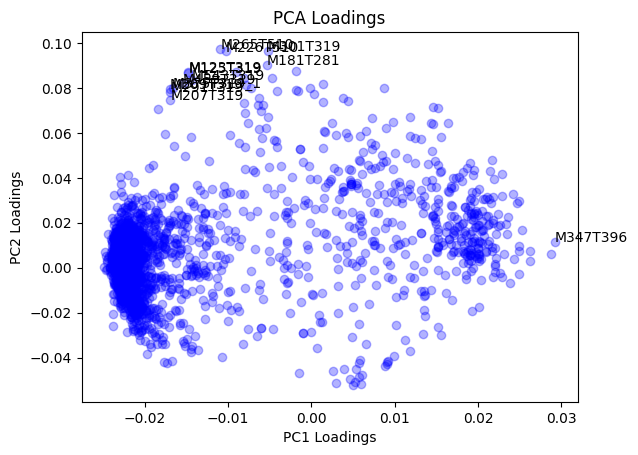

In [23]:
# PCA Loadings
# Get the loadings for the first two principal components
loadings = pca.components_

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loadings colored by chosen column
ax.scatter(loadings[0, :], loadings[1, :], color = 'blue', marker='o', alpha=0.3)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the distance of each point from the origin, weighted by the explained variance ratios
distances = np.sqrt((loadings[0, :]**2 * explained_variance_ratios[0]) + (loadings[1, :]**2 * explained_variance_ratios[1]))

# Calculate the 99.5th percentile of the distances
threshold = np.percentile(distances, 99.5)

# Annotate the points that are farther than the threshold from the origin
candidate_loadings = []
for i, feature in enumerate(data.iloc[:,0]):
    if distances[i] > threshold:
        ax.text(loadings[0, i], loadings[1, i], feature)
        candidate_loadings.append(feature)

# Add a title and labels
ax.set_title('PCA Loadings')
ax.set_xlabel('PC1 Loadings')
ax.set_ylabel('PC2 Loadings')
name = output_file_prefix + '_PCA_loadings'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text0 = 'PCA loadings plot was created and added into: ' + name
text1 = 'Candidate features (99.5th percentile) also highlighted in loadings graph are: ' + str(candidate_loadings)
report.add_together([
    ('text', text0),
    ('image', name),
    ('text', text1, 'normal', 'center'),
    'pagebreak'])

### PLSDA

In [24]:
import numpy as np

def vip(model):
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_
    p, h = w.shape
    vips = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
    return vips

C:\Users\janna\AppData\Local\Temp\ipykernel_25372\722066267.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p*(s.T @ weight)/total_s)


0       M138T350
78      M151T510
118     M123T319
170     M163T105
242     M412T349
280     M152T350
331     M231T350
513     M181T281
637     M153T510
792     M125T319
844     M187T350
1032    M265T510
1767    M226T510
Name: cpdID, dtype: object
R2: -0.019013364722893958
Q2:
4patro UMTM - Olomouc           -0.511446
Bez kofeinu - Opava             -0.511446
Brazílie - Krnov                -0.511446
Espresso - Honduras - Olomouc   -0.511446
Etiopie - Krnov                 -0.511446
Etiopie - Opava                 -0.511446
Etiopie Daro - Olomouc           0.215211
Etiopie Yirga - Olomouc          0.215211
Guatemala - Krnov               -0.511446
Guatemala - Opava               -0.511446
Honduras - Olomouc               0.215211
Keňa - Olomouc                   0.215211
Kolumbie - Olomouc               0.215211
Kostarika - Krnov               -0.511446
Kostarika - Olomouc              0.215211
Kuba - Opava                    -0.511446
PapuaNG - Opava                 -0.511446
QC      

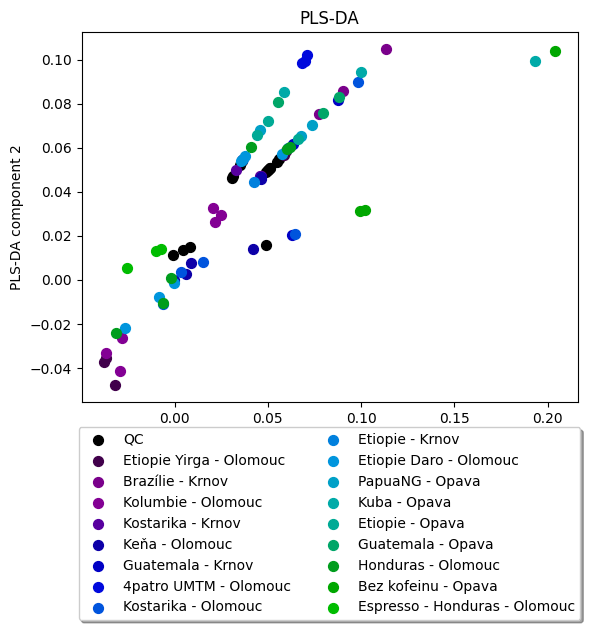

In [25]:
# Response variable name
column_name = 'Coffee Brand'

cmap = mpl.colormaps['nipy_spectral']

# Define the number of components to be used
n_comp = 2

# Define the number of folds for cross-validation
n_folds = 10

# Define the response variable
y = metadata[column_name]

# Convert the response variable to a categorical variable
y = pd.Categorical(y)

# Convert the categorical variable to a dummy (binary) variable
y = pd.get_dummies(y)

# Define the PLSDA model
model = PLSRegression(n_components=n_comp)

# Define the KFold cross-validator
kf = KFold(n_splits=n_folds)

# Initialize an array to hold the cross-validated predictions
y_cv = np.zeros(y.shape)

data_transposed = data.iloc[:, 1:].T

for train, test in kf.split(data_transposed):
    model.fit(data_transposed.iloc[train], y.iloc[train])
    y_cv[test] = model.predict(data_transposed.iloc[test])

# Fit the model on the entire dataset
model.fit(data.iloc[:, 1:].T, y)

# Calculate the VIP scores
vips = vip(model)
#print(vips)
# Print the names of the compounds with the VIP scores in the 99.5th percentile
candidate_vips = data.iloc[:, 0][vips > np.percentile(vips, 99.5)]
print(candidate_vips)

# Calculate the R2 and Q2
r2 = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)
q2 = 1 - mse / np.var(y)

# Print the R2 and Q2
print('R2:', r2)
print('Q2:')
print(q2)
 
# Plot the data in the space of the first two components
fig = plt.figure()
ax = fig.add_subplot(111)

#Color by the class of variable
nm_of_classes = len(metadata[column_name].unique())
colors = cmap(np.linspace(0, 0.5, nm_of_classes))
for i, c in zip(metadata[column_name].unique(), colors):
    mask = metadata[column_name] == i
    ax.scatter(y_cv[mask, 0], y_cv[mask, 1], color=c, label=i, s=50)
    
ax.set_xlabel('PLS-DA component 1')
ax.set_ylabel('PLS-DA component 2')
ax.set_title('PLS-DA')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
name = output_file_prefix + '_PLS-DA'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()

#---------------------------------------------
# REPORTING
text0 = '<b>PLS-DA</b> was performed with the ' + column_name + ' column as a response variable for the model'
text1 = 'R2: ' + str(round(r2, 2)) + ', Q2: ' + str(round(q2, 2)) + '.'
text2 = 'PLS-DA plot was created and added into: ' + name
text3 = 'Candidate features (99.5th percentile of VIP scores) are: ' + str(candidate_vips.tolist())
report.add_together([
    ('text', text0),
    ('text', text1, 'italic', 'left', 8),
    ('text', text2),
    ('image', name),
    ('text', text3, 'normal', 'center'),
    'pagebreak'])

C:\Users\janna\AppData\Local\Temp\ipykernel_25372\722066267.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
C:\Users\janna\AppData\Local\Temp\ipykernel_25372\3226392567.py:70: RuntimeWarning: invalid value encountered in sqrt
  lambda_ = np.sqrt(lambda_)


22        M266T413
87        M175T469
198       M280T382
221       M260T381
241       M196T324
357       M147T404
418       M161T470
878       M287T458
913       M261T382
1172      M247T381
1265      M166T411
1266    M166T411_1
1277      M527T387
Name: cpdID, dtype: object
R2: 0.7221830880965688
Q2:
N        0.717682
QC-IS    0.675948
R        0.800717
dtype: float64


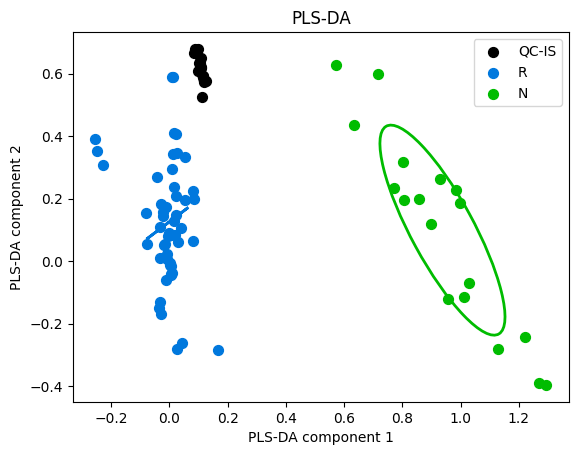

In [26]:
# Response variable name
column_name = 'Coffee Type'

cmap = mpl.colormaps['nipy_spectral']

# Define the number of components to be used
n_comp = 2

# Define the number of folds for cross-validation
n_folds = 10

# Define the response variable
y = metadata[column_name]

# Convert the response variable to a categorical variable
y = pd.Categorical(y)

# Convert the categorical variable to a dummy (binary) variable
y = pd.get_dummies(y)

# Define the PLSDA model
model = PLSRegression(n_components=n_comp)

# Define the KFold cross-validator
kf = KFold(n_splits=n_folds)

# Initialize an array to hold the cross-validated predictions
y_cv = np.zeros(y.shape)

data_transposed = data.iloc[:, 1:].T

for train, test in kf.split(data_transposed):
    model.fit(data_transposed.iloc[train], y.iloc[train])
    y_cv[test] = model.predict(data_transposed.iloc[test])

# Fit the model on the entire dataset
model.fit(data.iloc[:, 1:].T, y)

# Calculate the VIP scores
vips = vip(model)
#print(vips)
# Print the names of the compounds with the VIP scores in the 99.5th percentile
candidate_vips = data.iloc[:, 0][vips > np.percentile(vips, 99.5)]
print(candidate_vips)

# Calculate the R2 and Q2
r2 = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)
q2 = 1 - mse / np.var(y)

# Print the R2 and Q2
print('R2:', r2)
print('Q2:')
print(q2)
 
# Plot the data in the space of the first two components
fig = plt.figure()
ax = fig.add_subplot(111)

#Color by the class of variable
nm_of_classes = len(metadata[column_name].unique())
colors = cmap(np.linspace(0, 0.5, nm_of_classes))
for i, c in zip(metadata[column_name].unique(), colors):
    mask = metadata[column_name] == i
    ax.scatter(y_cv[mask, 0], y_cv[mask, 1], color=c, label=i, s=50)
    # Add ellipses for PLS-DA
    # Compute the covariance matrix and find the major and minor axis
    covmat = np.cov(y_cv[mask, :].T)
    lambda_, v = np.linalg.eig(covmat)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(y_cv[mask, 0]), np.mean(y_cv[mask, 1])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor=c, lw=2, facecolor='none')
    ax.add_artist(ell)
ax.set_xlabel('PLS-DA component 1')
ax.set_ylabel('PLS-DA component 2')
ax.set_title('PLS-DA')
ax.legend()
name = output_file_prefix + '_PLS-DA-grouped'
for sufix in sufixes:
    plt.savefig(name + sufix, bbox_inches='tight', dpi = 300)
plt.show()


#---------------------------------------------
# REPORTING
text0 = '<b>PLS-DA</b> was performed with the ' + column_name + ' column as a response variable for the model'
text1 = 'R2: ' + str(round(r2, 2)) + ', Q2: ' + str(round(q2, 2)) + '.'
text2 = 'PLS-DA plot was created and added into: ' + name
text3 = 'Candidate features (99.5th percentile of VIP scores) are: ' + str(candidate_vips.tolist())
report.add_together([
    ('text', text0),
    ('text', text1, 'italic', 'left', 8),
    ('text', text2),
    ('image', name),
    ('text', text3, 'normal', 'center')])

### Violin plots

In [27]:
# WILL TAKE QUITE SOME TIME TO RUN IF THERE IS A LOT OF FEATURES
# --------------------------------------------------------------
# ALSO
# WHILE THIS RUNS, MANY PDF FILES WILL BE GENERATED, BUT DON'T WORRY, THEY WILL BE DELETED AT THE END OF THE SCRIPT 
# (AFTER THE MERGING OF ALL THE PDF FILES INTO ONE)

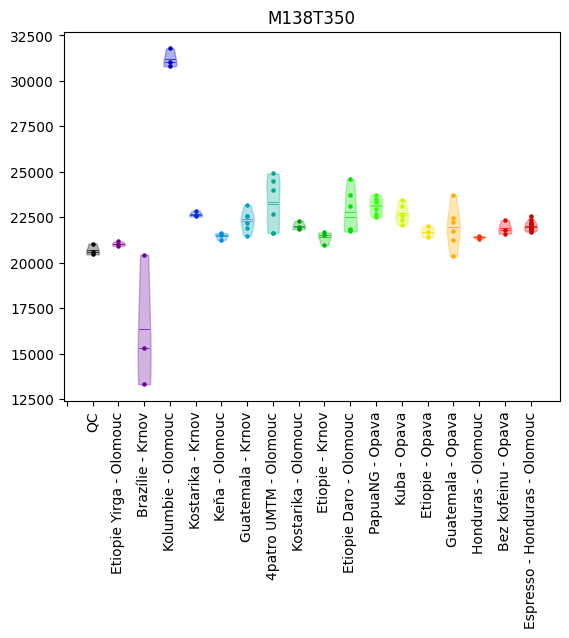

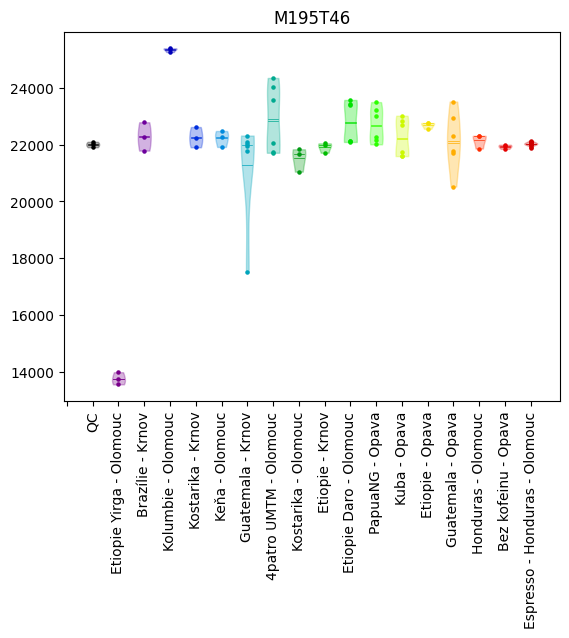

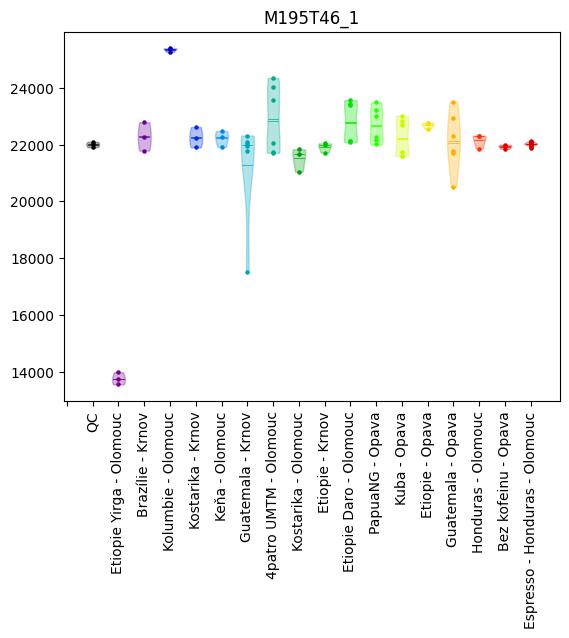

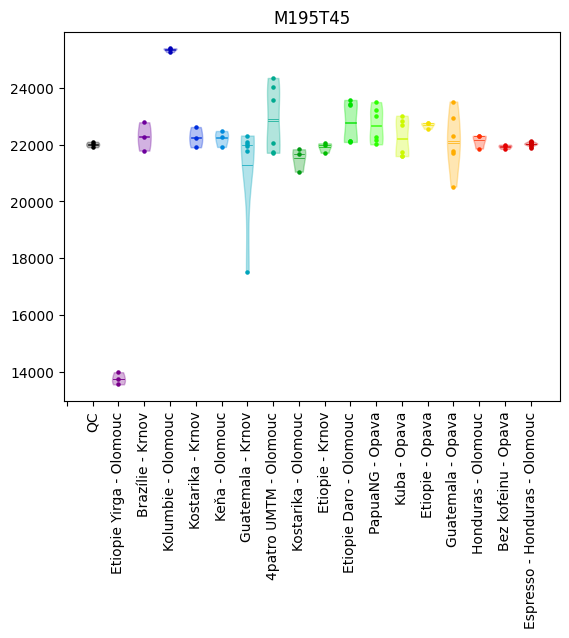

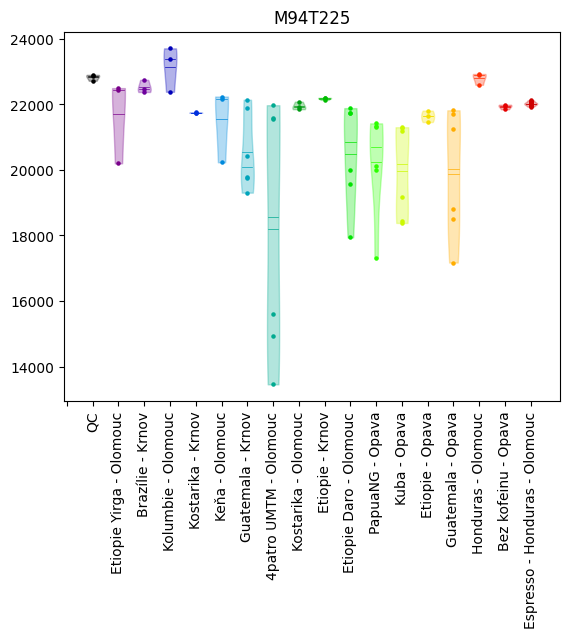

100 violin plots have been created
200 violin plots have been created
300 violin plots have been created
400 violin plots have been created
500 violin plots have been created
600 violin plots have been created
700 violin plots have been created
800 violin plots have been created
900 violin plots have been created
1000 violin plots have been created
1100 violin plots have been created
1200 violin plots have been created
1300 violin plots have been created
1400 violin plots have been created
1500 violin plots have been created
1600 violin plots have been created
1700 violin plots have been created
1800 violin plots have been created
1900 violin plots have been created
2000 violin plots have been created
2100 violin plots have been created
2200 violin plots have been created
2300 violin plots have been created
2400 violin plots have been created


In [28]:
column_name = 'Coffee Brand'

cmap = mpl.colormaps['nipy_spectral']

# Transpose 'data' so that rows represent samples and columns represent compounds
data_transposed = data_no_log_transf.T

# Add column to 'data_transposed'
column = metadata[column_name].to_list()
column.insert(0, None)
data_transposed[column_name] = column

column_unique_values = data_transposed[column_name].unique()
num_unique_values = len(column_unique_values)

# Group 'data_transposed' by 'column_name'
grouped = data_transposed.groupby(column_name)

# Delete this column from the data_transposed 
data_transposed = data_transposed.drop([column_name], axis=1)

show_indexes = [0, 1, 2, 3, 4]

for index in range(len(data_transposed.columns)):
    values = []
    for unique, group in grouped:
        if unique is not None:
            sample_values = group.iloc[:, index].dropna().to_list()  # Drop missing values
            if sample_values != [] and all(isinstance(x, (int, float)) for x in sample_values):  # Check if all values are numeric
                values.append(sample_values)
            else:
                values.append([0])  # Add a list with a single zero if data is missing or non-numeric
                print(unique)

    if values:  # Check if 'values' is not empty
        vp = plt.violinplot(values, showmeans=False, showmedians=False, showextrema=False)

        colors = [cmap(i/len(values)) for i in range(len(values))]

        # Change the color and width of the violins
        for i in range(len(vp['bodies'])):
            vp['bodies'][i].set_facecolor(colors[i])
            vp['bodies'][i].set_edgecolor(colors[i])
            vp['bodies'][i].set_linewidth(1)

        # Add custom mean and median lines
        for i, v in enumerate(values):
            plt.plot([i + 1 - 0.2, i + 1 + 0.2], [np.mean(v)] * 2, color=colors[i], linewidth=0.5)  # mean line
            plt.plot([i + 1 - 0.2, i + 1 + 0.2], [np.median(v)] * 2, color=colors[i], linewidth=0.5)  # median line

        # Scatter all the points
        for i in range(len(values)):
            plt.scatter([i+1]*len(values[i]), values[i], color=colors[i], s=5, alpha=1)

        plt.xticks(np.arange(len(column_unique_values)), column_unique_values, rotation=90)
        cpd_title = data_transposed.loc['cpdID', index]
        plt.title(cpd_title)

        # Save the figure to a separate image file
        file_name = main_folder + '/statistics/' + report_file_name + f'_violin_plot_{index}.pdf'
        plt.savefig(file_name, bbox_inches='tight')

        if index == 0:
            example_name = main_folder + '/statistics/violin-example'
            for sufix in sufixes:
                plt.savefig(example_name + sufix, bbox_inches='tight', dpi = 300)
        if index in show_indexes:
            plt.show() # Show the plot
        elif index % 100 == 0:
            print(f'{index} violin plots have been created')
        plt.close()

    
#---------------------------------------------
# MERGING all the PDF files into a single PDF file 
#(this way we should avoid loading all the plots into memory while creating all the plots)
#(we will load them eventually when creating the final PDF file, but it will not slow down the process of creating the plots)   
        
# Add all PDF files to a list
pdf_files = [main_folder + '/statistics/' + report_file_name + f'_violin_plot_{index}.pdf' for index in range(len(data_transposed.columns))]
name = main_folder + '/statistics/' + report_file_name + '_violin_plots.pdf'
# Merge all PDF files into a single PDF file
report.merge_pdfs(pdf_files, name)


#---------------------------------------------
# REPORTING
text0 = 'Violin plots of <b>all features</b> grouped by '+ column_name +' column, were created and added into one file: <b>' + name + '</b>'
text1 = 'Additionaly an example of such violin plot (shown below) was saved separately as: ' + example_name
report.add_together([
    ('text', text0),
    ('text', text1),
    ('image', example_name),
    'line'])

# Delete the temporary PDF files
for file in pdf_files:
    os.remove(file)

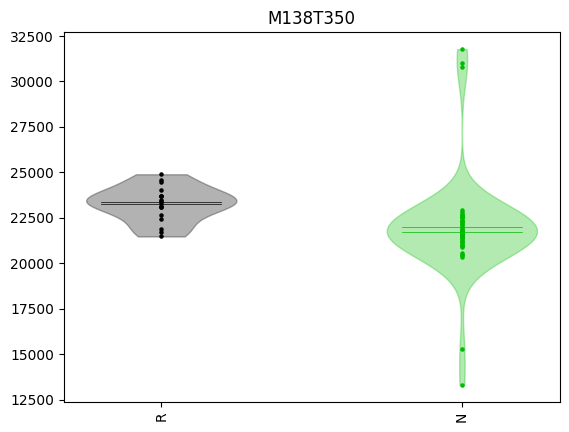

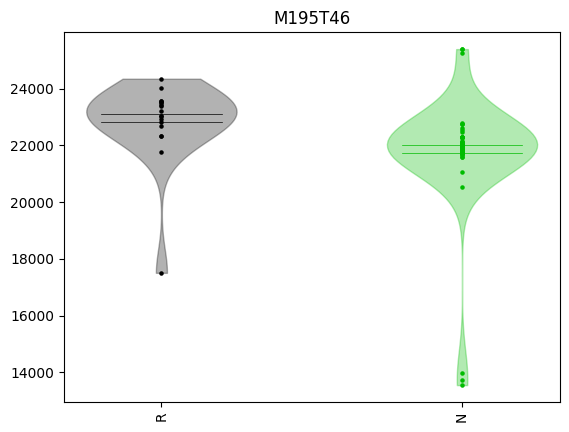

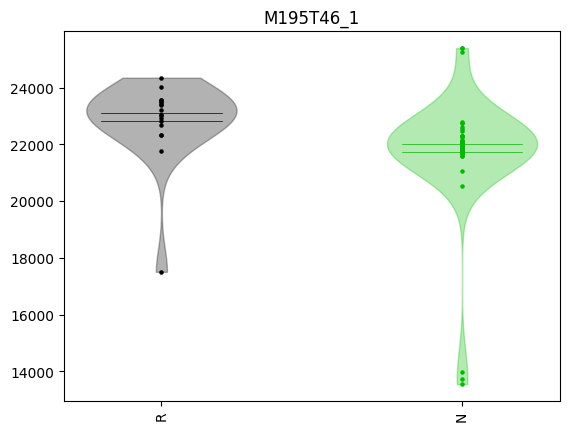

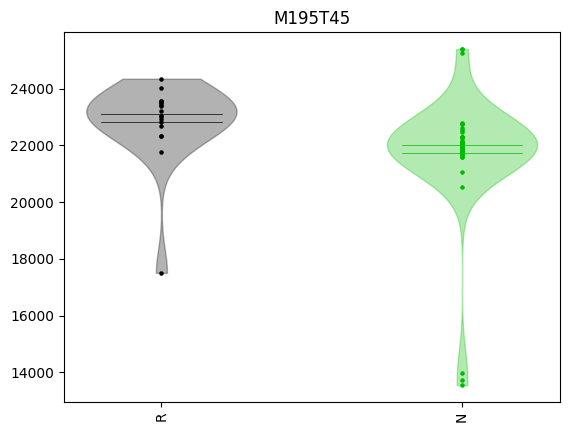

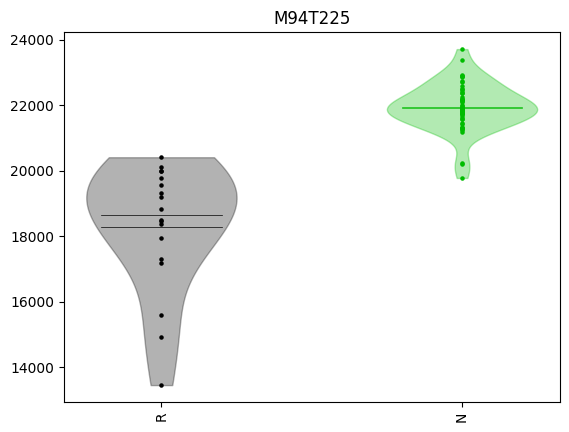

100 violin plots have been created
200 violin plots have been created
300 violin plots have been created
400 violin plots have been created
500 violin plots have been created
600 violin plots have been created
700 violin plots have been created
800 violin plots have been created
900 violin plots have been created
1000 violin plots have been created
1100 violin plots have been created
1200 violin plots have been created
1300 violin plots have been created
1400 violin plots have been created
1500 violin plots have been created
1600 violin plots have been created
1700 violin plots have been created
1800 violin plots have been created
1900 violin plots have been created
2000 violin plots have been created
2100 violin plots have been created
2200 violin plots have been created
2300 violin plots have been created
2400 violin plots have been created


In [29]:
## violin plots for roasted vs non-roasted
column_name = 'Coffee Type'
cmap = mpl.colormaps['nipy_spectral']

group_to_skip = 'QC-IS'

data_transposed = data_no_log_transf.T

# Add column to 'data_transposed'
column = metadata[column_name].to_list()
column.insert(0, None)
data_transposed[column_name] = column

# Get unique values from 'column_name' excluding 'QC-IS'
column_unique_values = [x for x in data_transposed[column_name].unique() if x != group_to_skip and x is not None]

# Group 'data_transposed' by 'column_name'
grouped = data_transposed.groupby(column_name)

# Delete this column from the data_transposed
data_transposed = data_transposed.drop([column_name], axis=1)



show_indexes = [0, 1, 2, 3, 4]

for index in range(len(data_transposed.columns)):
    values = []
    for unique, group in grouped:
        if unique is not None and unique != group_to_skip: 
            sample_values = group.iloc[:, index].dropna().to_list()  # Drop missing values
            if sample_values != [] and all(isinstance(x, (int, float)) for x in sample_values):  # Check if all values are numeric
                values.append(sample_values)
            else:
                values.append([0])  # Add a list with a single zero if data is missing or non-numeric
                print(unique)

    if values:  # Check if 'values' is not empty
        vp = plt.violinplot(values, showmeans=False, showmedians=False, showextrema=False)

        colors = [cmap(i/len(values)) for i in range(len(values))]

        # Change the color and width of the violins
        for i in range(len(vp['bodies'])):
            vp['bodies'][i].set_facecolor(colors[i])
            vp['bodies'][i].set_edgecolor(colors[i])
            vp['bodies'][i].set_linewidth(1)

        # Add custom mean and median lines
        for i, v in enumerate(values):
            plt.plot([i + 1 - 0.2, i + 1 + 0.2], [np.mean(v)] * 2, color=colors[i], linewidth=0.5)  # mean line
            plt.plot([i + 1 - 0.2, i + 1 + 0.2], [np.median(v)] * 2, color=colors[i], linewidth=0.5)  # median line

        # Scatter all the points
        for i in range(len(values)):
            plt.scatter([i+1]*len(values[i]), values[i], color=colors[i], s=5, alpha=1)

        plt.xticks(np.arange(1, len(column_unique_values) + 1), column_unique_values, rotation=90)
        cpd_title = data_transposed.loc['cpdID', index]
        plt.title(cpd_title)

        # Save the figure to a separate pdf file
        file_name = main_folder + '/statistics/' + report_file_name + f'_violin_plot_{index}_1.pdf'
        plt.savefig(file_name, bbox_inches='tight')

        if index == 0:
            example_name = main_folder + '/statistics/violin-example-grouped'
            for sufix in sufixes:
                plt.savefig(example_name + sufix, bbox_inches='tight', dpi = 300)
        if index in show_indexes:
            plt.show() # Show the plot
        elif index % 100 == 0:
            print(f'{index} violin plots have been created')
        plt.close()


#---------------------------------------------
# MERGING all the PDF files into a single PDF file 
#(this way we should avoid loading all the plots into memory while creating all the plots)
#(we will load them eventually when creating the final PDF file, but it will not slow down the process of creating the plots)   
        
# Add all PDF files to a list
pdf_files = [main_folder + '/statistics/' + report_file_name + f'_violin_plot_{index}_1.pdf' for index in range(len(data_transposed.columns))]
name = main_folder + '/statistics/' + report_file_name + '_violin_plots-grouped.pdf'
# Merge all PDF files into a single PDF file
report.merge_pdfs(pdf_files, name)

#---------------------------------------------
# REPORTING
text0 = 'Violin plots of <b>all features</b> grouped by '+ column_name +' column, were created and added into one file: <b>' + name + '</b>'
text1 = 'Additionaly an example of such violin plot (shown below) was saved separately as: ' + example_name
report.add_together([
    ('text', text0),
    ('text', text1),
    ('image', example_name),
    'line'])

# Delete the temporary PDF files
for file in pdf_files:
    os.remove(file)

## Finishing touches

In [30]:
#----------------------------------------------
#Build the pdf file
report.finalize_report()